<a href="https://colab.research.google.com/github/bala909/DIGITAL-PORTFOIO/blob/main/Sales12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sales=pd.read_csv('/content/Sales.csv.zip')

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [ ]:
sales['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [ ]:
shape=sales.shape
Roe=shape[0]
Col=shape[1]
print(f'Rows of Dataset is :{Roe}')
print(f'colum of Dataset is :{Col}')


Rows of Dataset is :113036
colum of Dataset is :18


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
sales['Date']=pd.to_datetime(sales['Date'])

In [ ]:
sales["Calculated_Date"]=sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format( x[0],x[1],x[2]),axis=1)
sales["Calculated_Date"]=pd.to_datetime(sales['Calculated_Date'])
sales["Calculated_Date"].head()

<ipython-input-9-3174149815>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales["Calculated_Date"]=sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format( x[0],x[1],x[2]),axis=1)


,Calculated_Date
0,2013-11-26
1,2015-11-26
2,2014-03-23
3,2016-03-23
4,2014-05-15


In [ ]:
sales.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [ ]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,2014-11-23 12:14:55.063519232
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,2011-01-01 00:00:00
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2013-12-22 00:00:00
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,2014-06-27 00:00:00
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,2016-01-09 00:00:00
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,2016-07-31 00:00:00
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674,NaN


In [ ]:
sales['Unit_Cost'].describe()

,Unit_Cost
count,113036.000000
mean,267.296366
std,549.835483
min,1.000000
25%,2.000000
50%,9.000000
75%,42.000000
max,2171.000000


In [ ]:
sales['Unit_Cost'].mean()

np.float64(267.296365759581)

In [ ]:
sales['Unit_Cost'].median()

9.0

<Axes: >

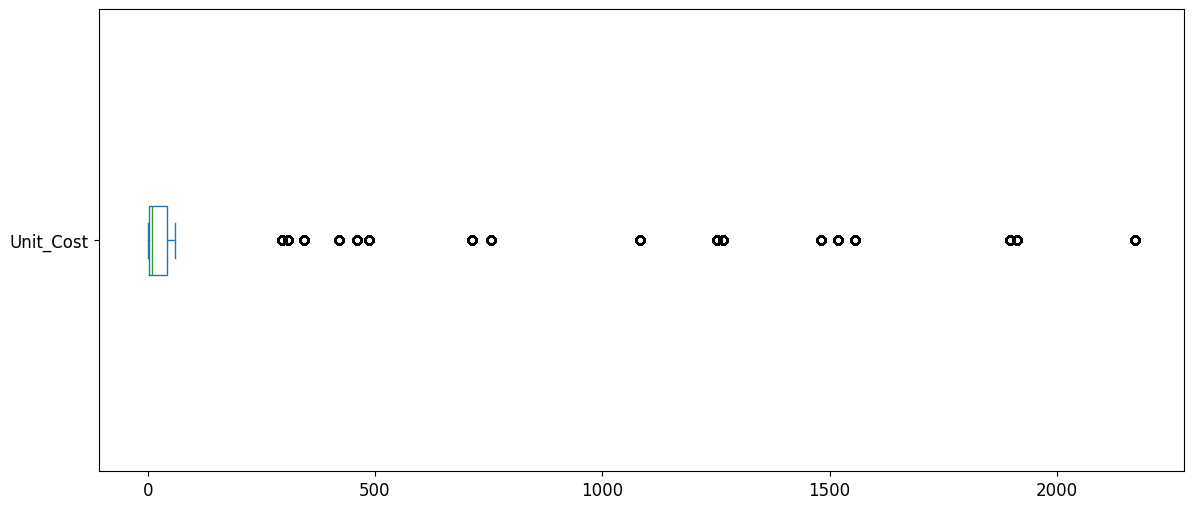

In [ ]:
sales['Unit_Cost'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

Text(0, 0.5, 'Sales')

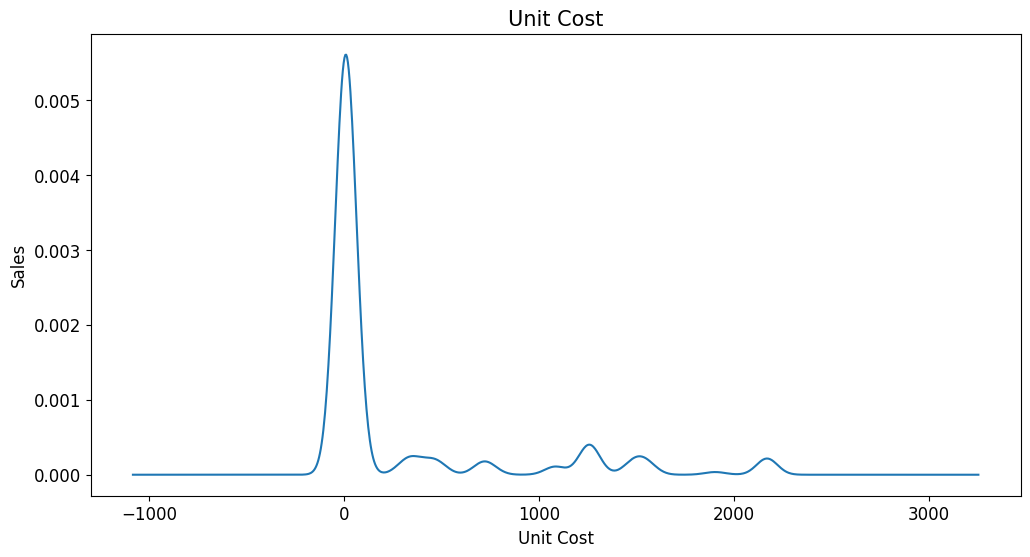

In [ ]:
sales['Unit_Cost'].plot(kind="density" , figsize=(12,6), fontsize=12)
plt.title("Unit Cost",fontsize=15)
plt.xlabel("Unit Cost",fontsize=12)
plt.ylabel("Sales",fontsize=12)

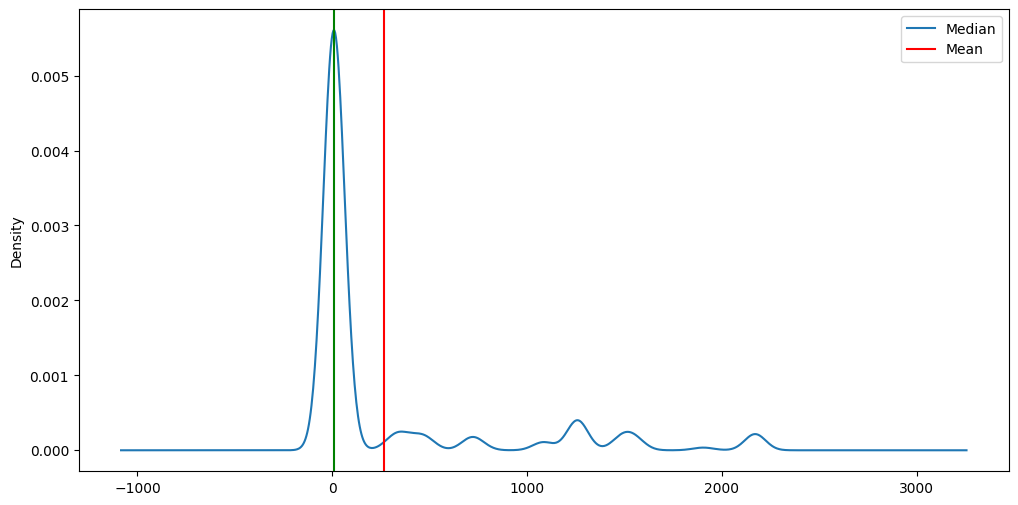

In [ ]:
ax=sales['Unit_Cost'].plot(kind="density" , figsize=(12,6))
#ax.axvlines(sales['Unit_Cost'].mean())
mean= ax.axvline(sales['Unit_Cost'].mean(), color='red' )
median = ax.axvline(sales['Unit_Cost'].median(), color='g')
plt.legend({'Median':median,'Mean':mean})

Text(0.5, 0, 'Dollars')

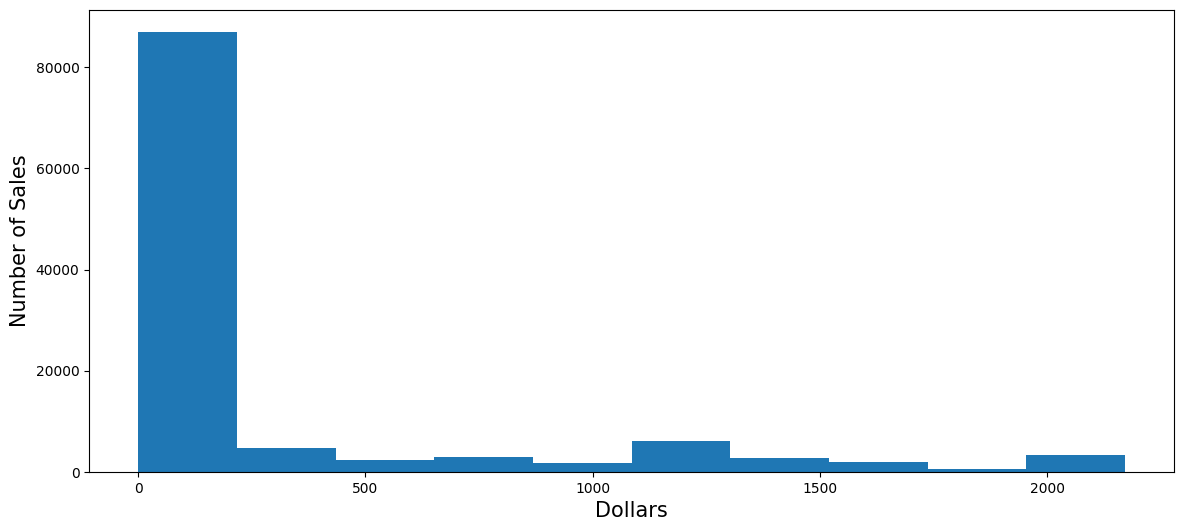

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales', fontsize=15)
ax.set_xlabel('Dollars', fontsize=15)

In [ ]:
sales["Customer_Age"].value_counts().mean()


np.float64(1614.8)

<Axes: >

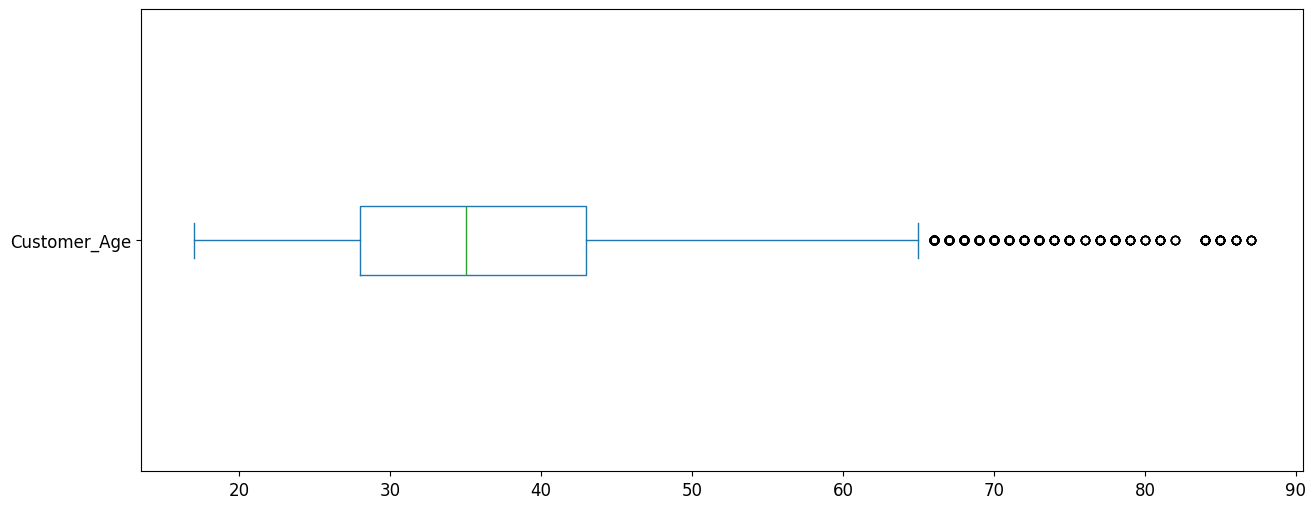

In [ ]:
sales["Customer_Age"].plot(kind='box',vert=False,figsize=(15,6), fontsize=12)

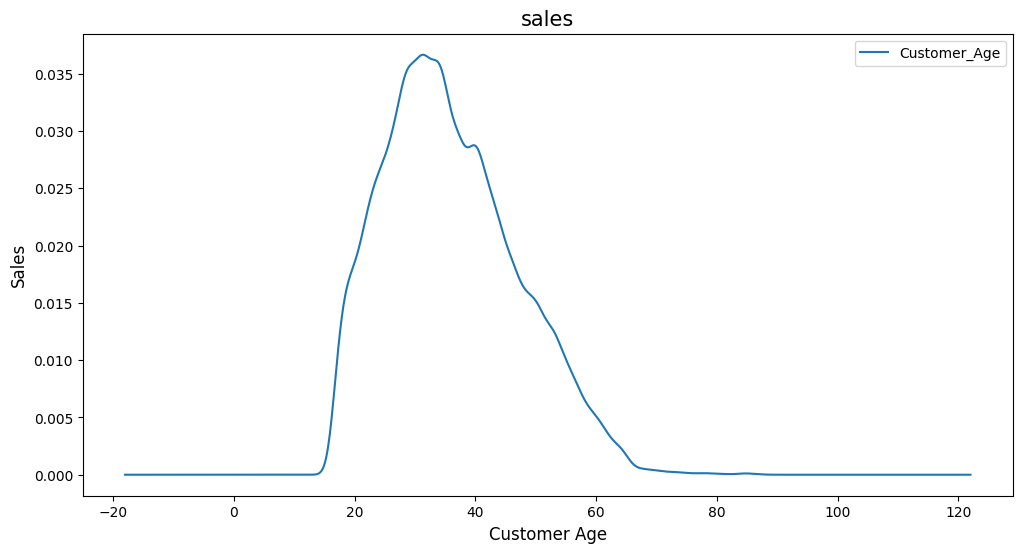

In [ ]:
sales["Customer_Age"].plot(kind='kde',figsize=(12,6))
plt.title("sales",fontsize=15)
plt.xlabel("Customer Age",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.legend()

In [ ]:
sales['Year'].value_counts()

,count
Year,
2016,29398
2014,29398
2015,24443
2013,24443
2012,2677
2011,2677


<Axes: xlabel='Year'>

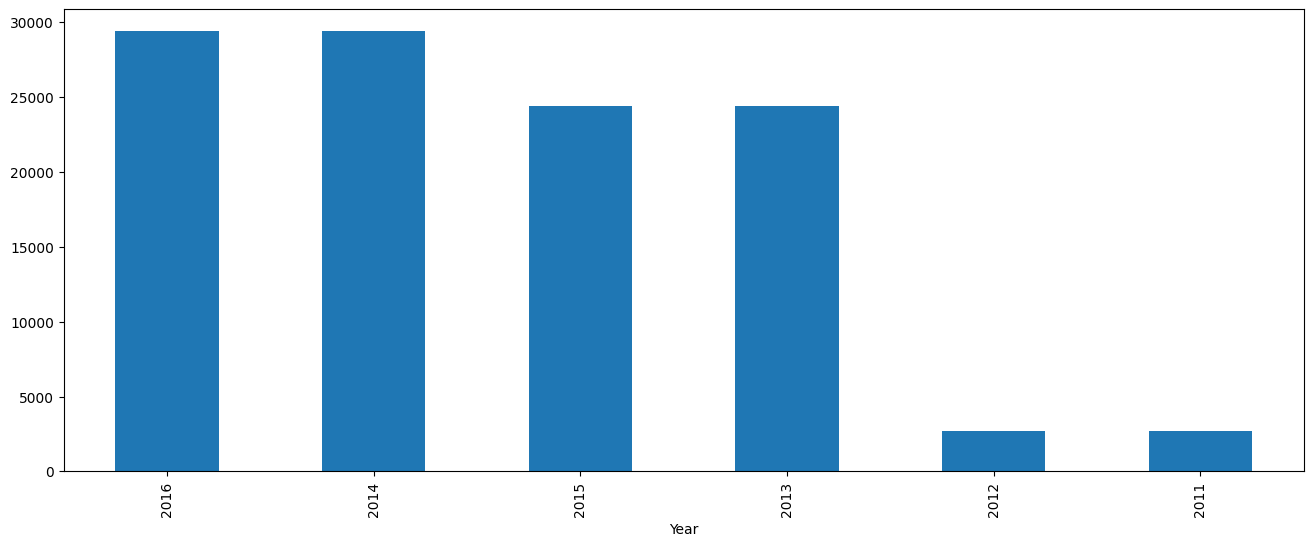

In [ ]:
sales["Year"].value_counts().plot(kind="bar",figsize=(16,6))

In [ ]:
sales['Month'].value_counts()

,count
Month,
June,11234
December,11200
May,11128
April,10182
March,9674
January,9284
February,9022
October,8750
November,8734


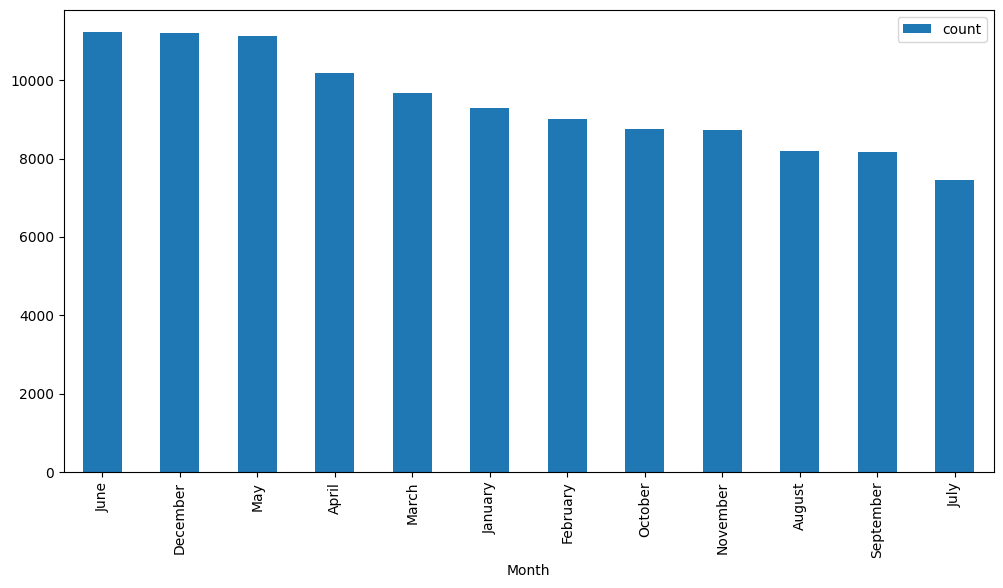

In [ ]:
sales["Month"].value_counts().plot(kind="bar",figsize=(12,6))
plt.legend()

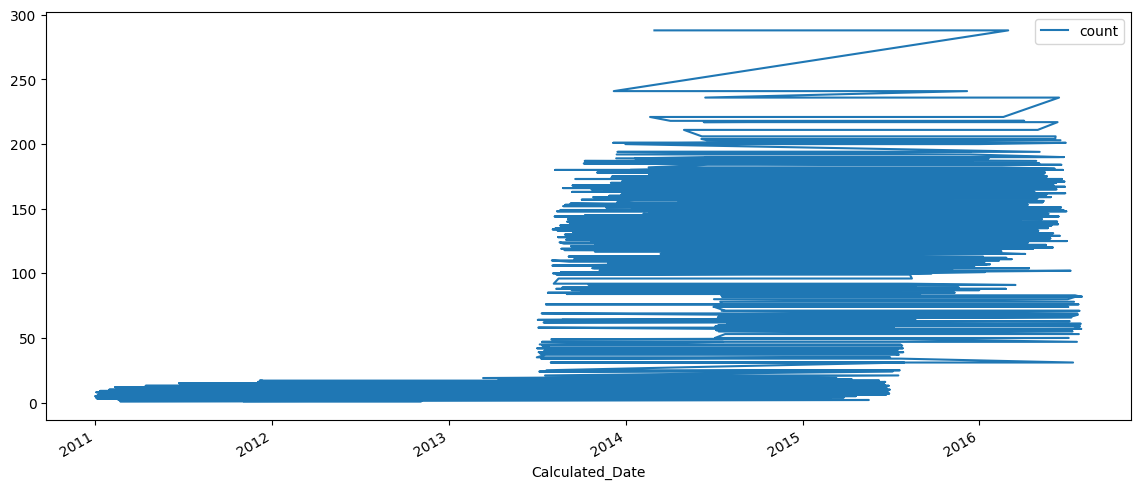

In [ ]:
sales['Calculated_Date'].value_counts().plot(kind="line",figsize=(14,6))
plt.legend()

In [ ]:
sales['Revenue']+50

,Revenue
0,1000
1,1000
2,2451
3,2138
4,468
...,...
113031,234
113032,1233
113033,1233
113034,1310


In [ ]:
sales['Age_Group'].value_counts()

,count
Age_Group,
Adults (35-64),55824
Young Adults (25-34),38654
Youth (<25),17828
Seniors (64+),730


Text(0.5, 0, 'Age')

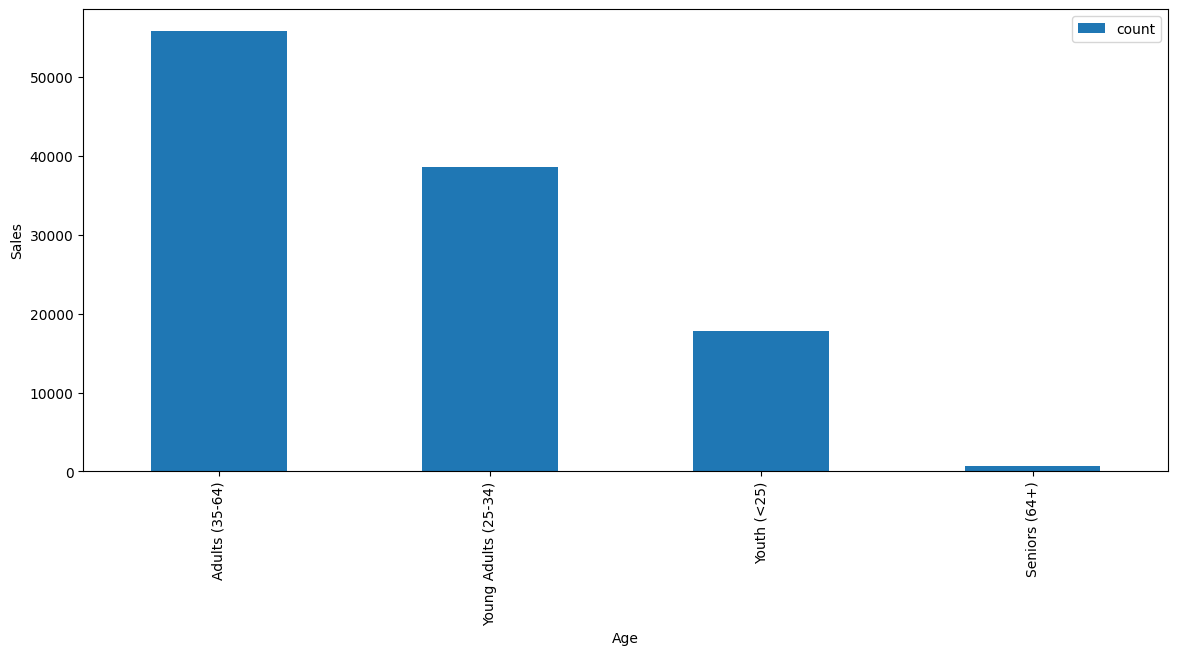

In [ ]:
sales["Age_Group"].value_counts().plot(kind='bar',figsize=(14,6))
plt.legend()
plt.legend()
plt.ylabel("Sales")
plt.xlabel("Age")

Text(0.5, 1.0, 'Age Group')

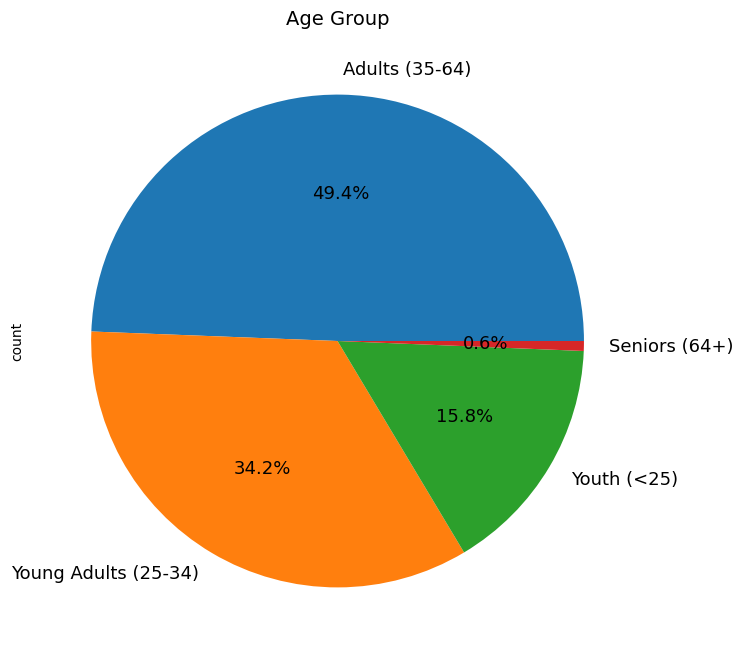

In [ ]:
sales["Age_Group"].value_counts().plot(kind='pie',figsize=(14,8),autopct='%1.1f%%',fontsize=13)
plt.title("Age Group",fontsize=14)

In [ ]:
sales["Order_Quantity"].mean()

np.float64(11.901659648253654)

Text(0.5, 1.0, 'Order Quality')

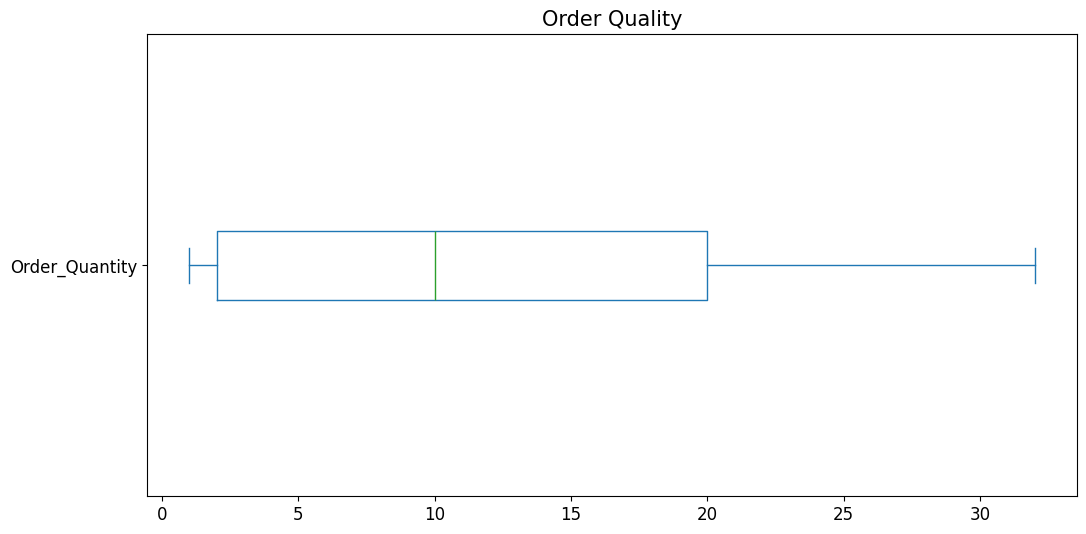

In [ ]:
sales["Order_Quantity"].plot(kind='box',vert=False,figsize=(12,6),fontsize=12)
plt.title("Order Quality",fontsize=15)

In [ ]:
sales['Country'].value_counts()

,count
Country,
United States,39206
Australia,23936
Canada,14178
United Kingdom,13620
Germany,11098
France,10998


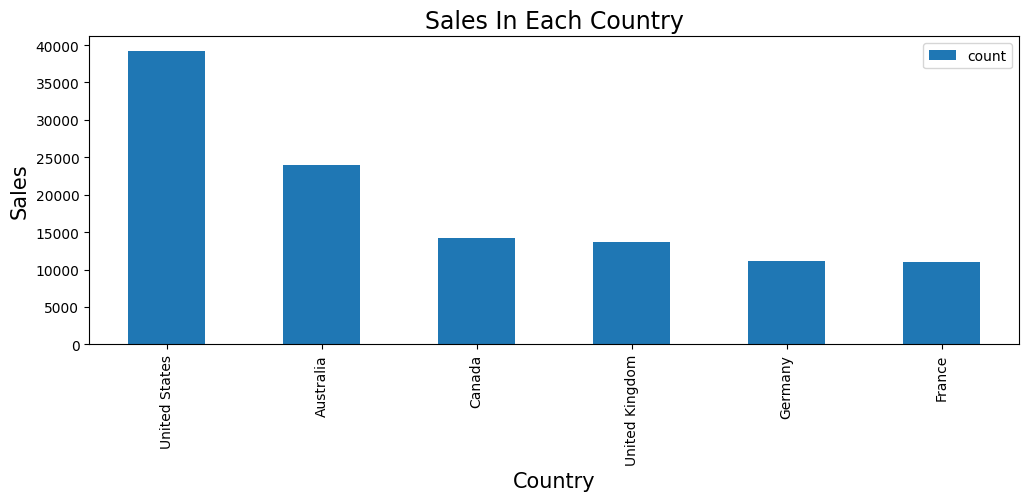

In [ ]:
sales['Country'].value_counts().plot(kind='bar',figsize=(12,4))
plt.title("Sales In Each Country",fontsize=17)
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.legend()

In [ ]:
MostSales=sales.loc[: ,"Product"].unique()
# sales['Product'].unique()

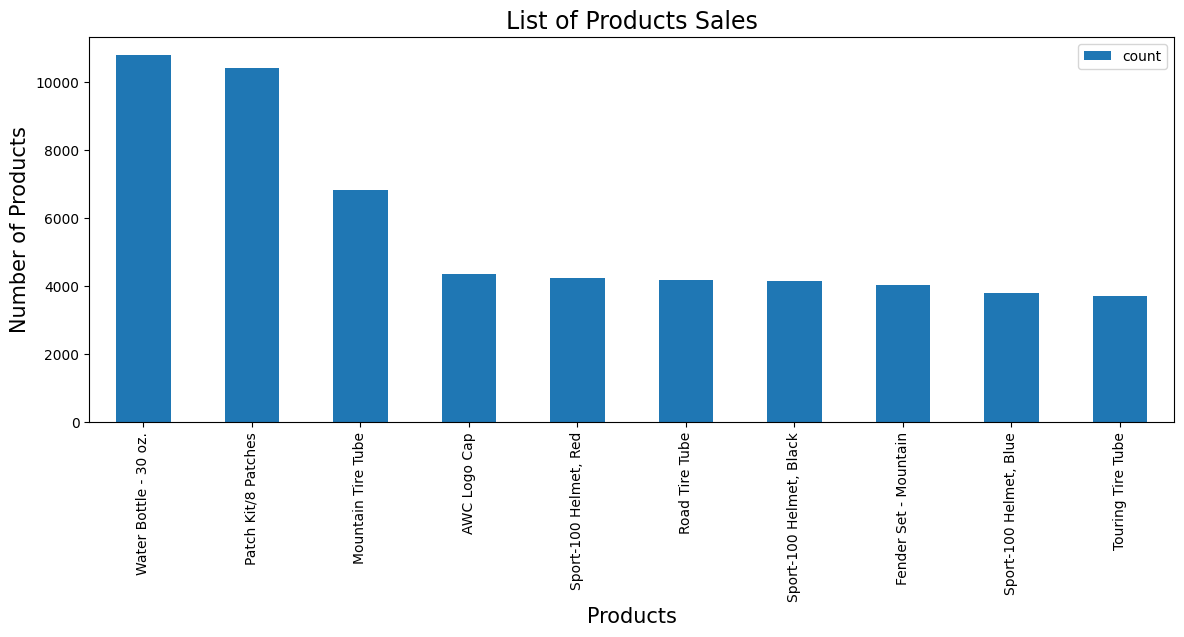

In [ ]:
sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of Products Sales",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.legend()

Text(0.5, 0, 'Unit Cost')

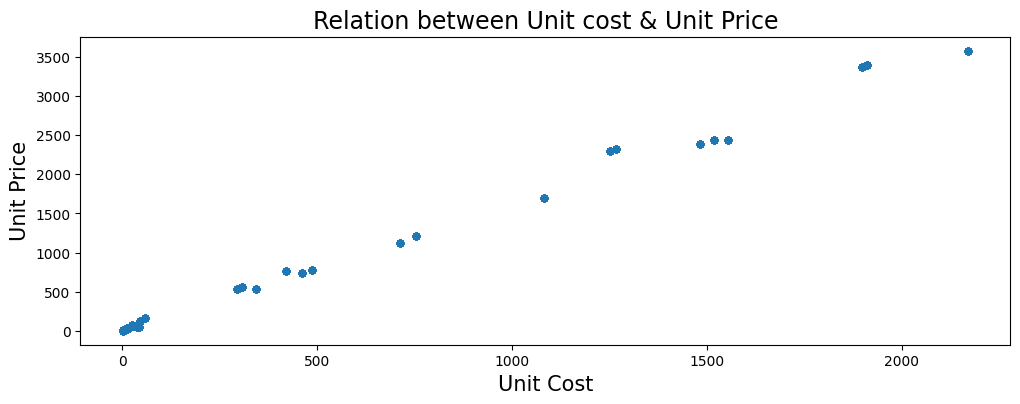

In [ ]:
sales.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relation between Unit cost & Unit Price",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

Text(0.5, 1.0, 'Relation Between Order Quantity & Profit')

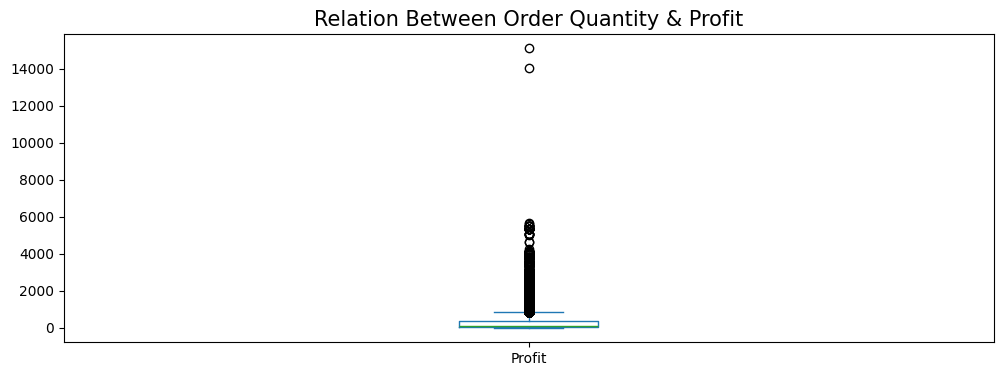

In [ ]:
sales.plot(kind="box",x='Order_Quantity',y='Profit',figsize=(12,4),fontsize=10)
plt.title("Relation Between Order Quantity & Profit",fontsize=15)

Text(0.5, 1.0, 'Relation between Country & Unit Profit')

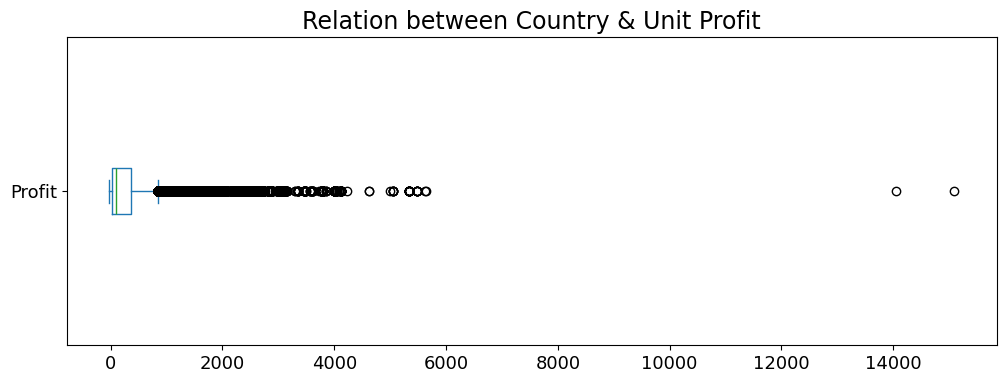

In [ ]:
sales.plot(kind="box",x='Country',y='Profit',figsize=(12,4),fontsize=13,vert=False )
plt.title("Relation between Country & Unit Profit",fontsize=17)

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

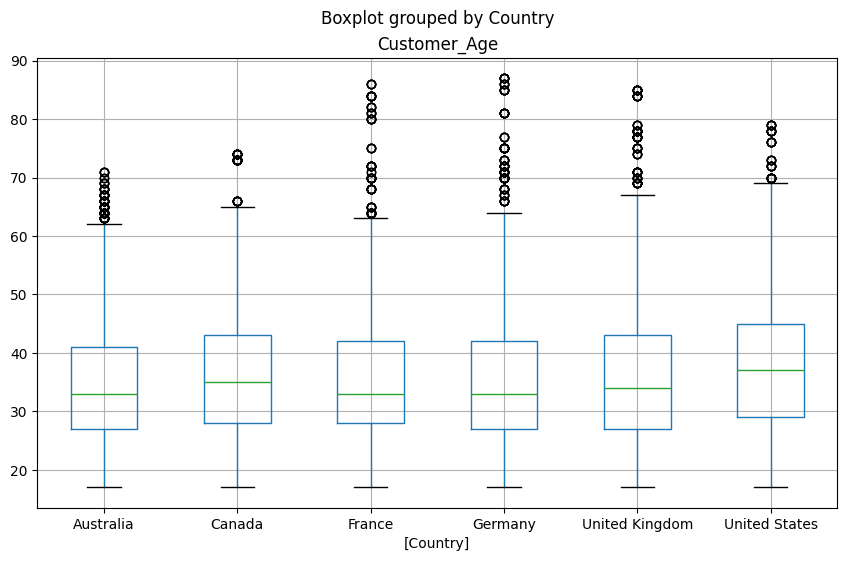

In [ ]:
sales[["Customer_Age","Country"]].boxplot(by='Country',figsize=(10,6))

In [ ]:
sales.loc[((sales['Country']=='Canada' ) |  (sales['Country']=='France' ))].shape[0]

25176

In [ ]:
sales.loc[(sales['Country']=='Canada' ) & (sales['Sub_Category']=="Bike Racks")].shape[0]

104

In [ ]:
sales.loc[sales["Country"]=="France","State"].value_counts()

,count
State,
Seine (Paris),2328
Seine Saint Denis,1684
Nord,1670
Hauts de Seine,1084
Essonne,994
Yveline,954
Seine et Marne,394
Moselle,386
Loiret,382


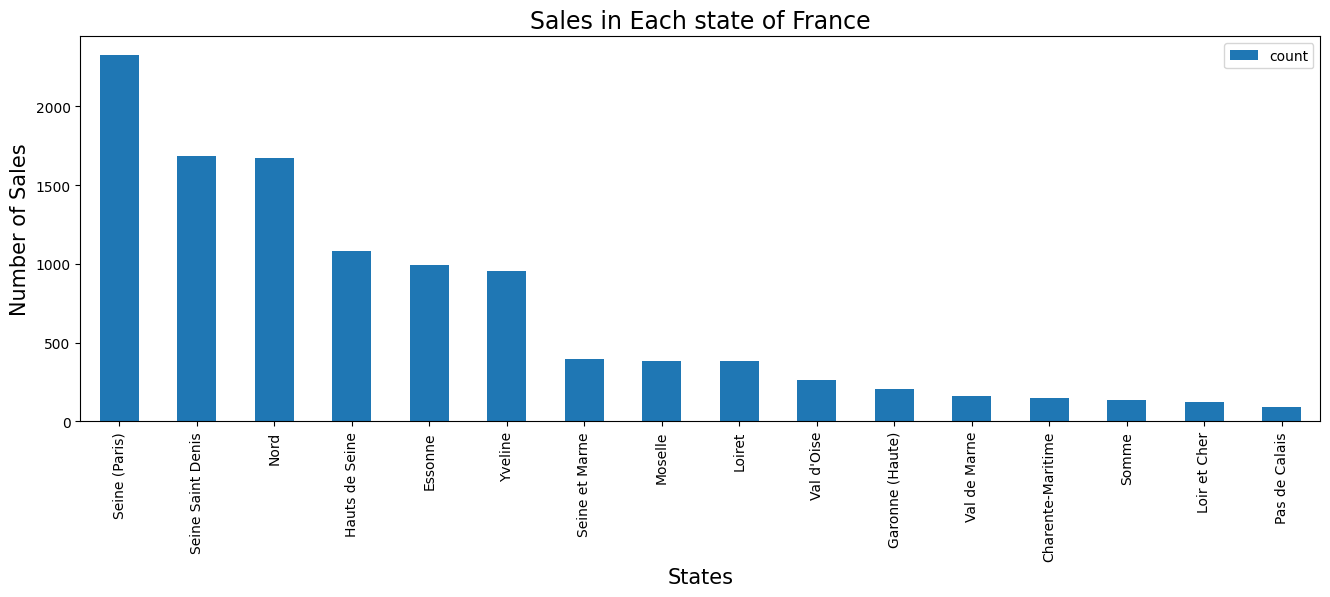

In [ ]:
sales.loc[sales["Country"]=="France","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales in Each state of France",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

In [ ]:
sales['Sub_Category'].value_counts()

,count
Sub_Category,
Tires and Tubes,33870
Bottles and Cages,15876
Road Bikes,13430
Helmets,12158
Mountain Bikes,8854
Jerseys,6010
Caps,4358
Fenders,4032
Touring Bikes,3698


NameError: name 'wedges' is not defined

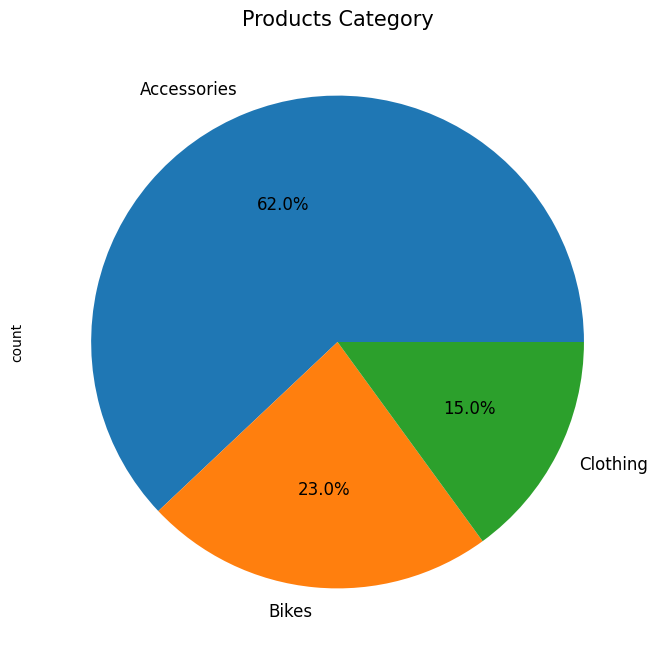

In [ ]:
sales['Product_Category'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=12)
Cat=sales['Sub_Category'].unique()
plt.title("Products Category",fontsize=15)
plt.legend(wedges, Cat,fontsize=12,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:
sales["Sub_Category"].value_counts()

,count
Sub_Category,
Tires and Tubes,33870
Bottles and Cages,15876
Road Bikes,13430
Helmets,12158
Mountain Bikes,8854
Jerseys,6010
Caps,4358
Fenders,4032
Touring Bikes,3698


In [ ]:
sales.loc[sales['Product_Category']=='Accessories' ,"Sub_Category"].value_counts()

,count
Sub_Category,
Tires and Tubes,33870
Bottles and Cages,15876
Helmets,12158
Fenders,4032
Cleaners,1802
Hydration Packs,1334
Bike Racks,592
Bike Stands,456


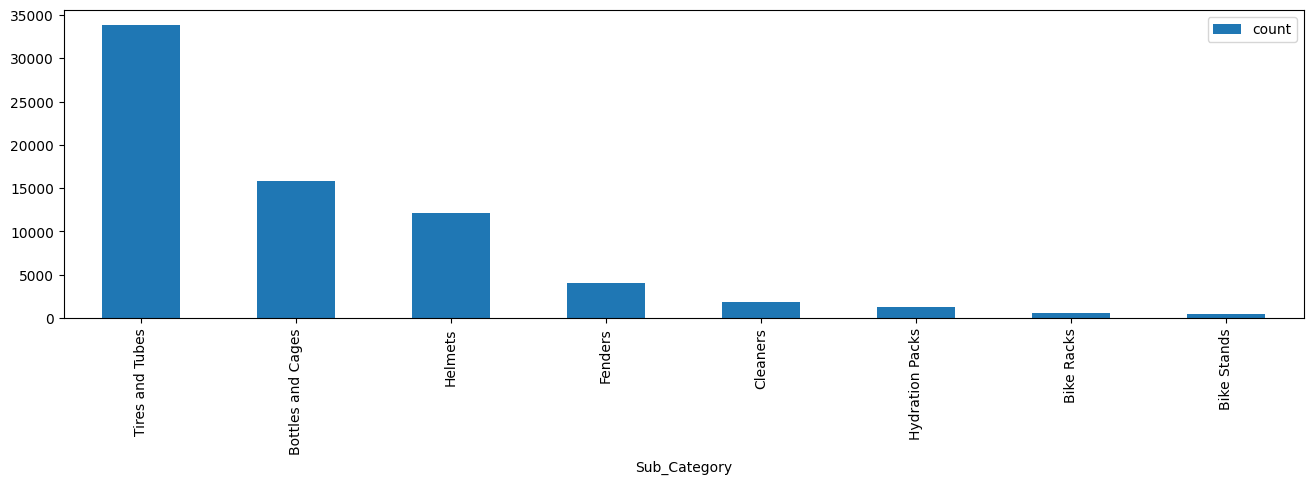

In [ ]:
sales.loc[sales['Product_Category']=='Accessories' ,"Sub_Category"].value_counts().plot(kind="bar",figsize=(16,4))
plt.legend()

In [ ]:
sales.loc[sales['Product_Category']=="Bikes","Sub_Category"].value_counts()

,count
Sub_Category,
Road Bikes,13430
Mountain Bikes,8854
Touring Bikes,3698


Text(0.5, 1.0, 'Products Category in Bikes')

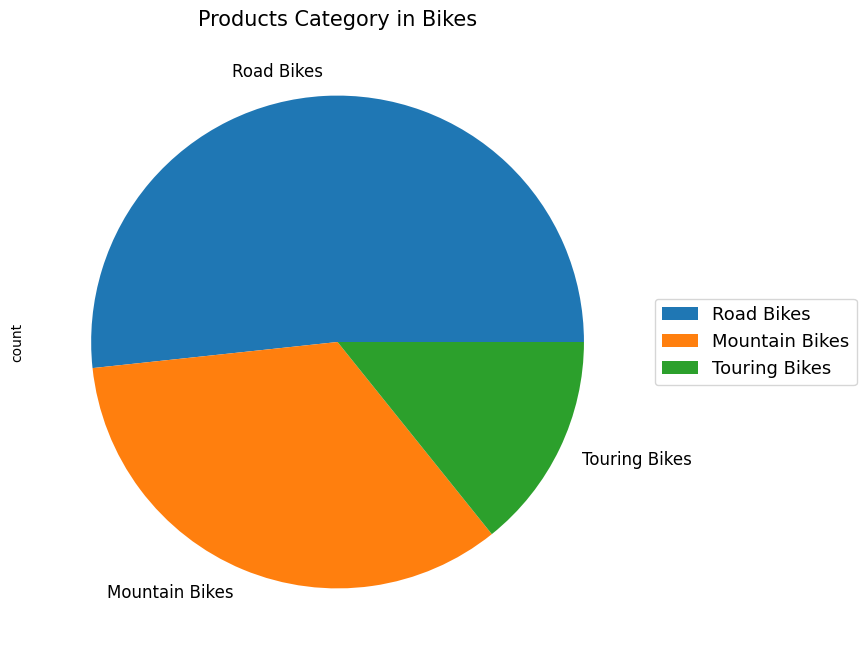

In [ ]:
Pc=sales.loc[sales['Product_Category']=="Bikes","Sub_Category"].unique()
sales.loc[sales['Product_Category']=="Bikes","Sub_Category"].value_counts().plot(kind="pie",figsize=(8,8),fontsize=12)
plt.legend(fontsize=13,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Products Category in Bikes",fontsize=15)

In [ ]:
sales['Customer_Gender'].value_counts()

,count
Customer_Gender,
M,58312
F,54724


Text(0, 0.5, 'Sales')

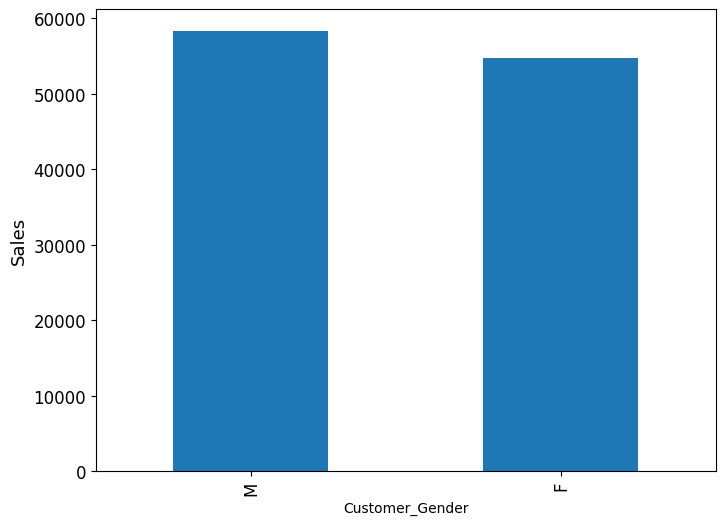

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='bar',fontsize=12,figsize=(8,6))
plt.ylabel("Sales",fontsize=13)

In [ ]:
sales.loc[(sales['Customer_Gender']=="M") & (sales["Revenue"]>=500)].shape[0]

21781

In [ ]:
sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5485,8684,14169,2011-03-20
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14169,2011-07-05


In [ ]:
sales['Revenue'].max()


58074

In [ ]:
sales.loc[sales["Revenue"]>10_000 , "Order_Quantity"].mean()


np.float64(3.7218934911242605)

In [ ]:
sales.loc[sales["Revenue"]<10_000,"Order_Quantity"].mean()

np.float64(11.913907519469818)

In [ ]:
sales.loc[(sales["Year"]==2016) & (sales["Month"]=='May')].shape[0]

5015

In [ ]:
sales.loc[(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]

12164

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

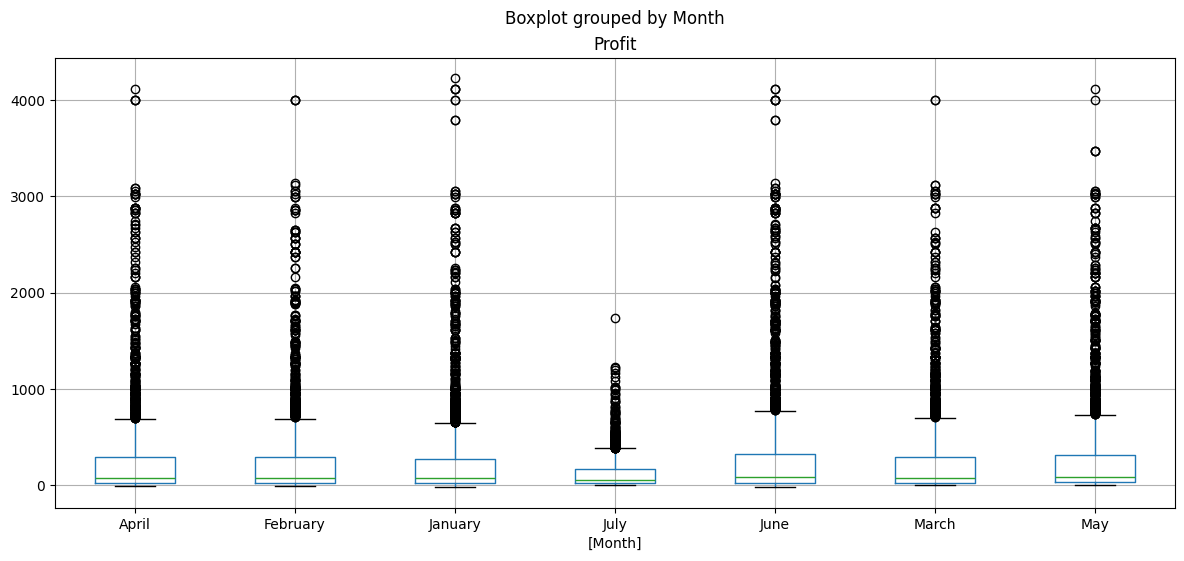

In [ ]:
Saels2016=sales.loc[sales["Year"]==2016 , ['Profit',"Month"]]
Saels2016.boxplot(by="Month", figsize=(14,6))

In [ ]:
sales.loc[sales["Country"]=="United State",'Unit_Price']*=1.072

In [ ]:
sales["Unit_Price"].head(2)

,Unit_Price
0,120
1,120


<Figure size 1600x800 with 0 Axes>

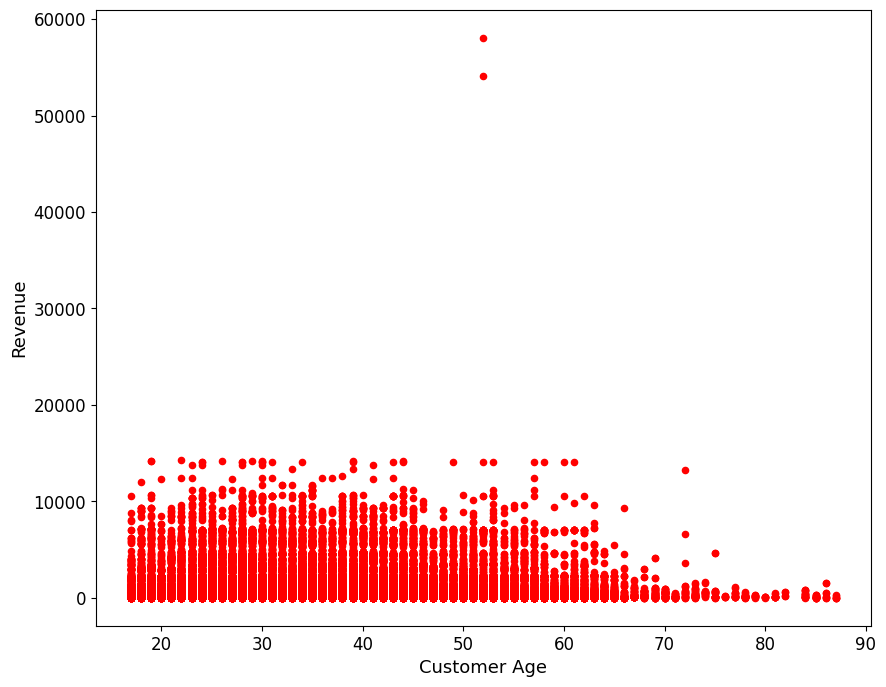

In [ ]:
plt.figure(figsize=(16,8))
sales.plot(kind="scatter",x="Customer_Age",y="Revenue",color="Red",figsize=(10,8),fontsize=12)
plt.xlabel("Customer Age",fontsize=13)
plt.ylabel("Revenue",fontsize=13)
plt.show()

Text(0, 0.5, 'Profit')

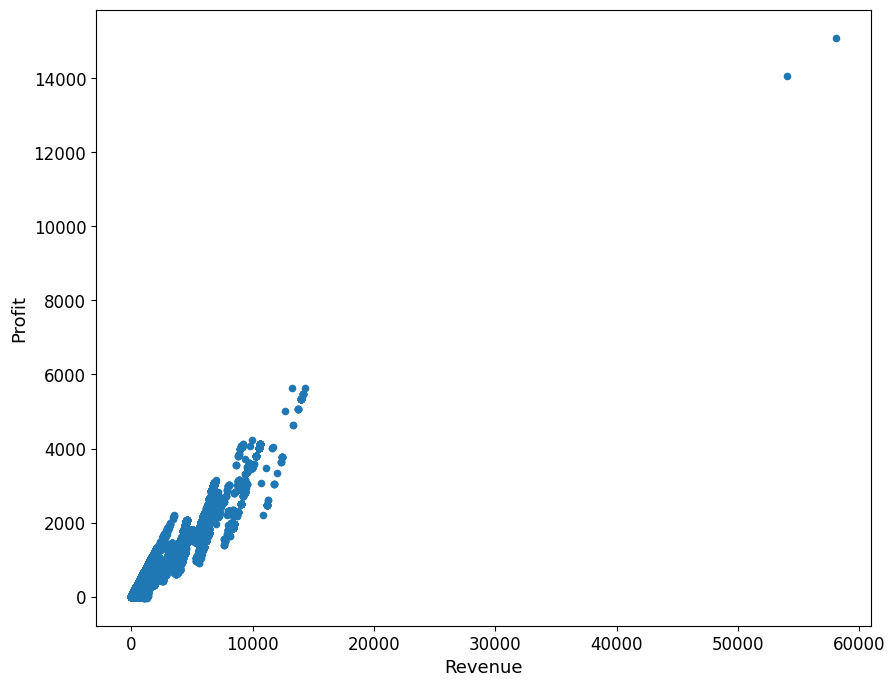

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(10,8),fontsize=12)
plt.xlabel("Revenue",fontsize=13)
plt.ylabel("Profit",fontsize=13)

In [ ]:
sales["Revenu_Per_Age"] = sales["Revenue"]/sales['Customer_Age']

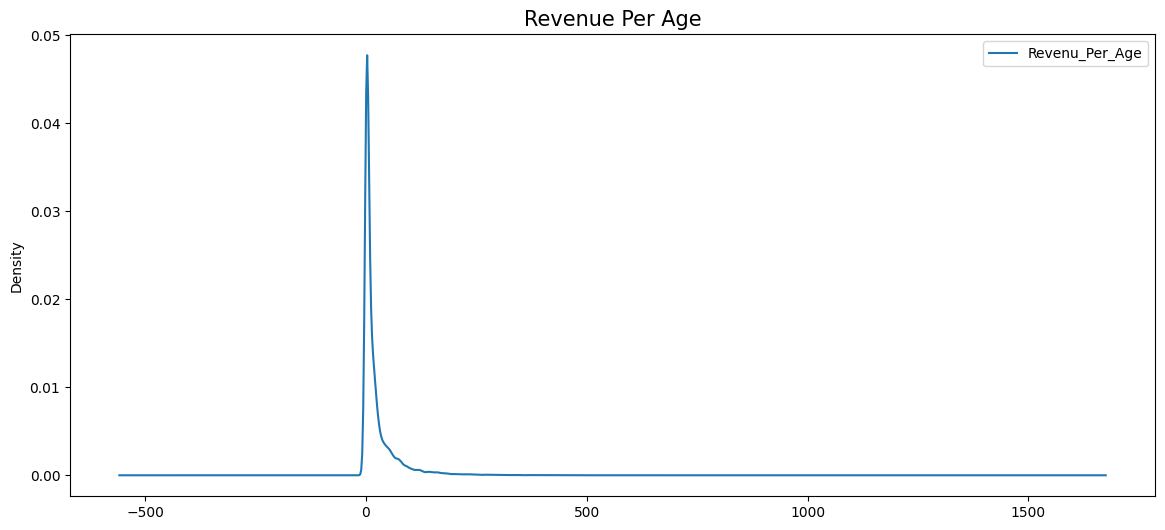

In [ ]:
sales['Revenu_Per_Age'].plot(kind='density', figsize=(14,6))
plt.title("Revenue Per Age",fontsize=15)


plt.legend()

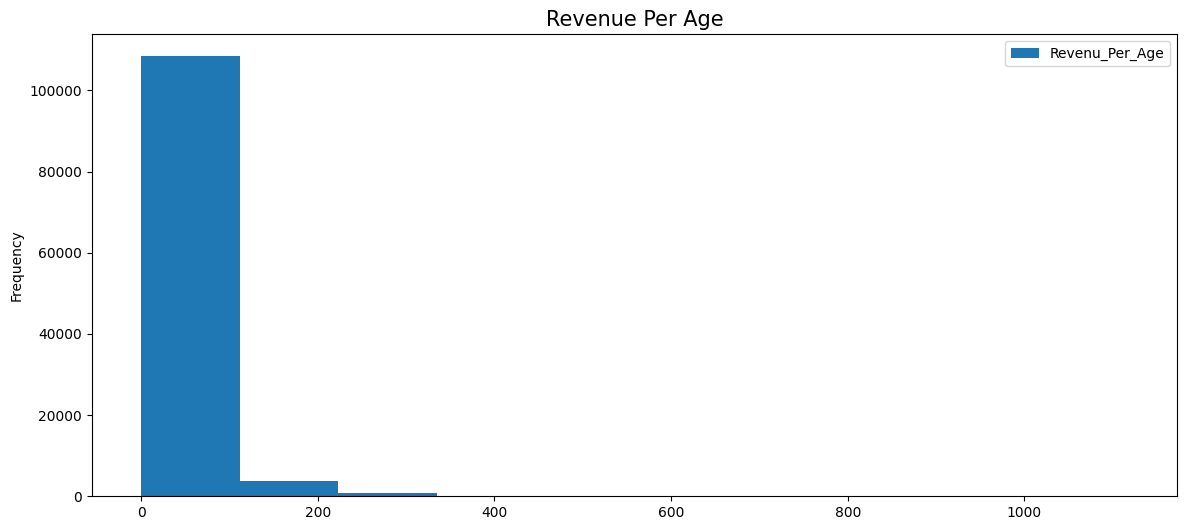

In [ ]:
sales['Revenu_Per_Age'].plot(kind='hist', figsize=(14,6))
plt.title("Revenue Per Age",fontsize=15)
plt.legend()

In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

In [ ]:
sales['Calculates_Revenue']= sales["Cost"] + sales["Profit"]

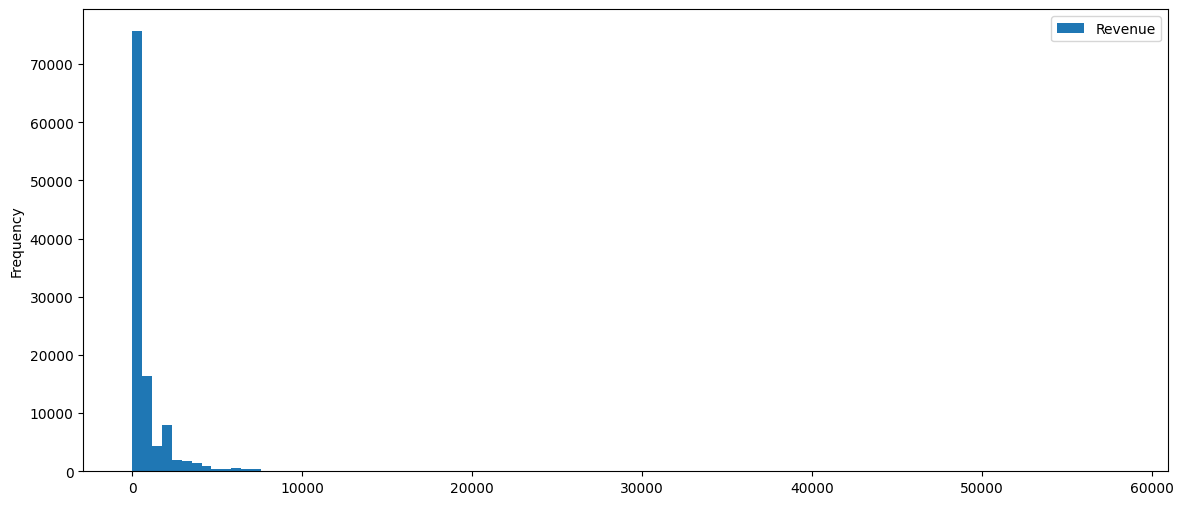

In [ ]:
sales["Revenue"].plot(kind="hist" , bins=100 ,figsize=(14,6))
plt.legend()

In [ ]:
Tax = 1.03
Unit_Price_Tax=sales['Unit_Price']*Tax

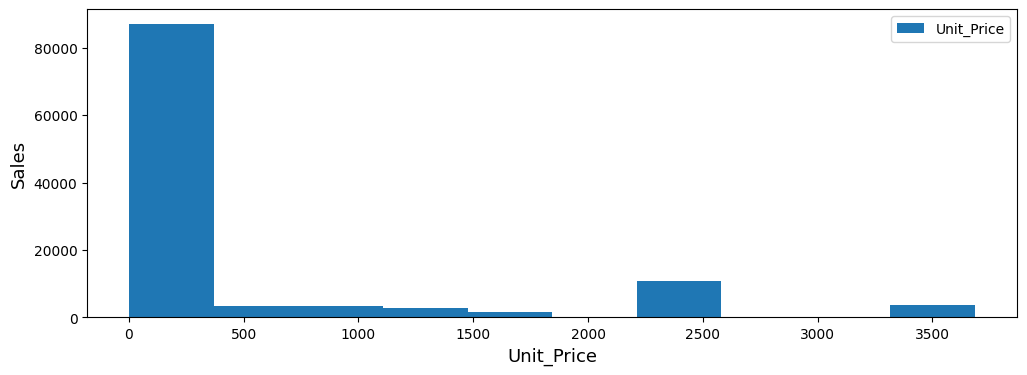

In [ ]:
Unit_Price_Tax.plot(kind="hist",figsize=(12,4))
plt.xlabel("Unit_Price",fontsize=13)
plt.ylabel("Sales",fontsize=13)
plt.legend()

In [ ]:
sales.loc[sales["State"]=='Kentucky'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Revenu_Per_Age,Calculated_Cost,Calculates_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,1,45,120,63,45,108,2013-11-04,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,1,45,120,63,45,108,2015-11-04,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,12,8,22,142,96,238,2014-04-16,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,14,8,22,165,112,277,2016-04-16,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,29,13,35,537,377,914,2014-04-16,22.850,377,914


In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

np.float64(762.8287654055604)

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

np.float64(726.7260473588342)

In [ ]:
Revenue_France=sales.loc[sales['Country']=="France",'Revenue']
Revenue_France*=1.1

In [ ]:
Revenue_France

,Revenue
50,865.7
51,865.7
52,3252.7
53,3136.1
60,688.6
...,...
112979,1892.0
113000,405.9
113001,473.0
113034,1386.0


In [ ]:
Corr=sales.corr()
Corr

ValueError: could not convert string to float: 'November'

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.matshow(Corr, cmap='RdBu', fignum=figure.number)
plt.xticks(range(len(Corr.columns)),Corr.columns,rotation='vertical')
plt.yticks(range(len(Corr.columns)), Corr.columns);

NameError: name 'Corr' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
sales.to_excel('Sales_New.xlsx')